# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**FM1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

TEAM MEMBERS: Amukelani, Tamika, Thabatha, Jean, Koketso, Dikeledi


### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics.correlation import plot_corr
%matplotlib inline

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn import ensemble

#Libraries for Model Performance
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 80

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# look at data statistics
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [5]:
#data shape checking number of rows and number of features
df_train.shape

(8763, 49)

In [6]:
df_test.shape

(2920, 48)

In [7]:
# presents data info for each column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [9]:
# identify train df datatypes
print(df_train.dtypes)

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

In [10]:
# identify test df datatype
print(df_test.dtypes)

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h            int64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h          int64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

In [11]:
#show null values in train data
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [12]:
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

In [13]:
# missing training data entries & percentage
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

,Total,Percent
Valencia_pressure,2068,0.235992
Unnamed: 0,0,0.000000
Madrid_weather_id,0,0.000000
Bilbao_pressure,0,0.000000
Seville_weather_id,0,0.000000


In [14]:
# missing test data entries & percentage
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

,Total,Percent
Valencia_pressure,454,0.155479
Unnamed: 0,0,0.000000
time,0,0.000000
Barcelona_weather_id,0,0.000000
Bilbao_pressure,0,0.000000


In [15]:
# train data: seperated numerical and catergorical features
numbers = ['int64', 'float64']
df_num_train = df_train.select_dtypes(include=numbers)# select numerical feature
df_cat_train= df_train.select_dtypes(include='object')# select catergorical features

In [16]:
# test data: seperated numerical and catergorical features
numbers = ['int64', 'float64']
df_num_test = df_test.select_dtypes(include=numbers)# select numerical feature
df_cat_test= df_test.select_dtypes(include='object')# select catergorical features

In [17]:
# data stats for train df
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [18]:
#data stats for test df
df_test.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000
mean,10222.500000,2.457820,0.067517,3.012785,67.123516,62.644463,43.355422,2.283562,15.477283,162.643836,...,290.695462,288.888393,289.911289,284.920684,286.522375,289.124971,288.483641,290.152431,287.869763,286.618130
std,843.075718,1.774838,0.153381,1.996340,20.611292,24.138393,30.486298,1.654787,25.289197,97.749873,...,7.113599,9.089699,7.119411,6.803424,6.492355,7.168049,6.221324,7.906915,8.977511,8.733163
min,8763.000000,0.000000,0.000000,0.000000,11.666667,8.000000,0.000000,0.000000,0.000000,0.000000,...,273.816667,269.816667,272.650000,266.483333,268.120000,271.483333,270.138667,271.150000,268.713333,267.816667
25%,9492.750000,1.333333,0.000000,1.666667,52.000000,43.000000,13.333333,1.000000,0.000000,86.666667,...,284.816667,281.483333,284.307500,280.150000,281.778333,283.483333,284.150000,284.483333,280.816667,279.816667
50%,10222.500000,2.000000,0.000000,2.333333,70.333333,63.000000,45.000000,1.666667,0.000000,140.000000,...,290.150000,287.483333,289.483333,284.483333,286.265000,288.816667,288.483333,289.150000,286.396667,285.483333
75%,10952.250000,3.333333,0.000000,4.000000,85.000000,84.000000,75.000000,3.333333,20.000000,233.333333,...,296.483333,295.483333,295.816667,289.816667,291.119167,295.150000,292.816667,295.150000,294.452500,293.150000
max,11682.000000,13.333333,1.600000,14.333333,100.000000,100.000000,97.333333,10.666667,93.333333,360.000000,...,309.483333,313.483333,308.150000,307.483333,308.966667,306.816667,310.816667,314.483333,312.223333,310.150000


C:\Users\Tamika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x480 with 0 Axes>

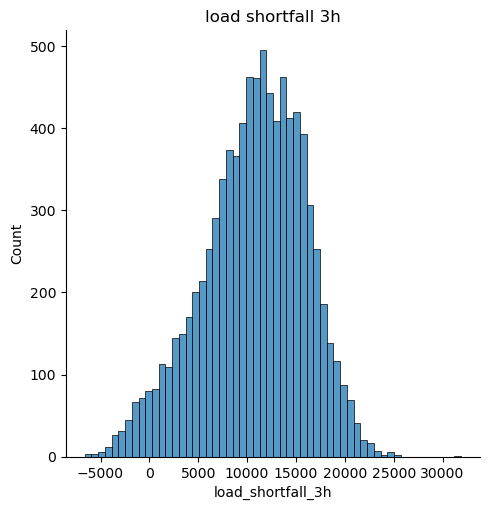

In [19]:
# target varible distribution for train data
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
sns.displot(df_train['load_shortfall_3h'])
plt.title('load shortfall 3h')
plt.show()

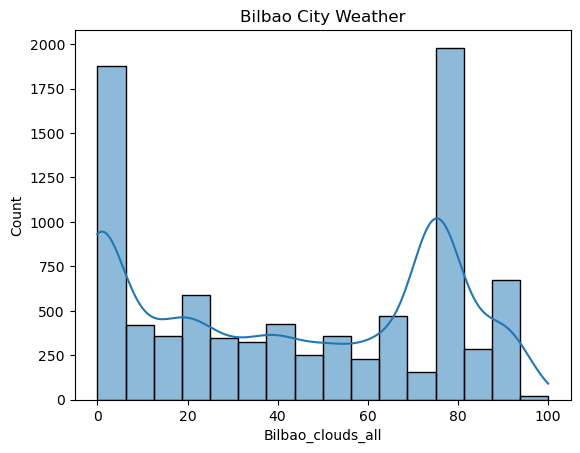

In [20]:
sns.histplot(df_train['Bilbao_clouds_all'], kde= True)
plt.title('Bilbao City Weather')
plt.show()

C:\Users\Tamika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


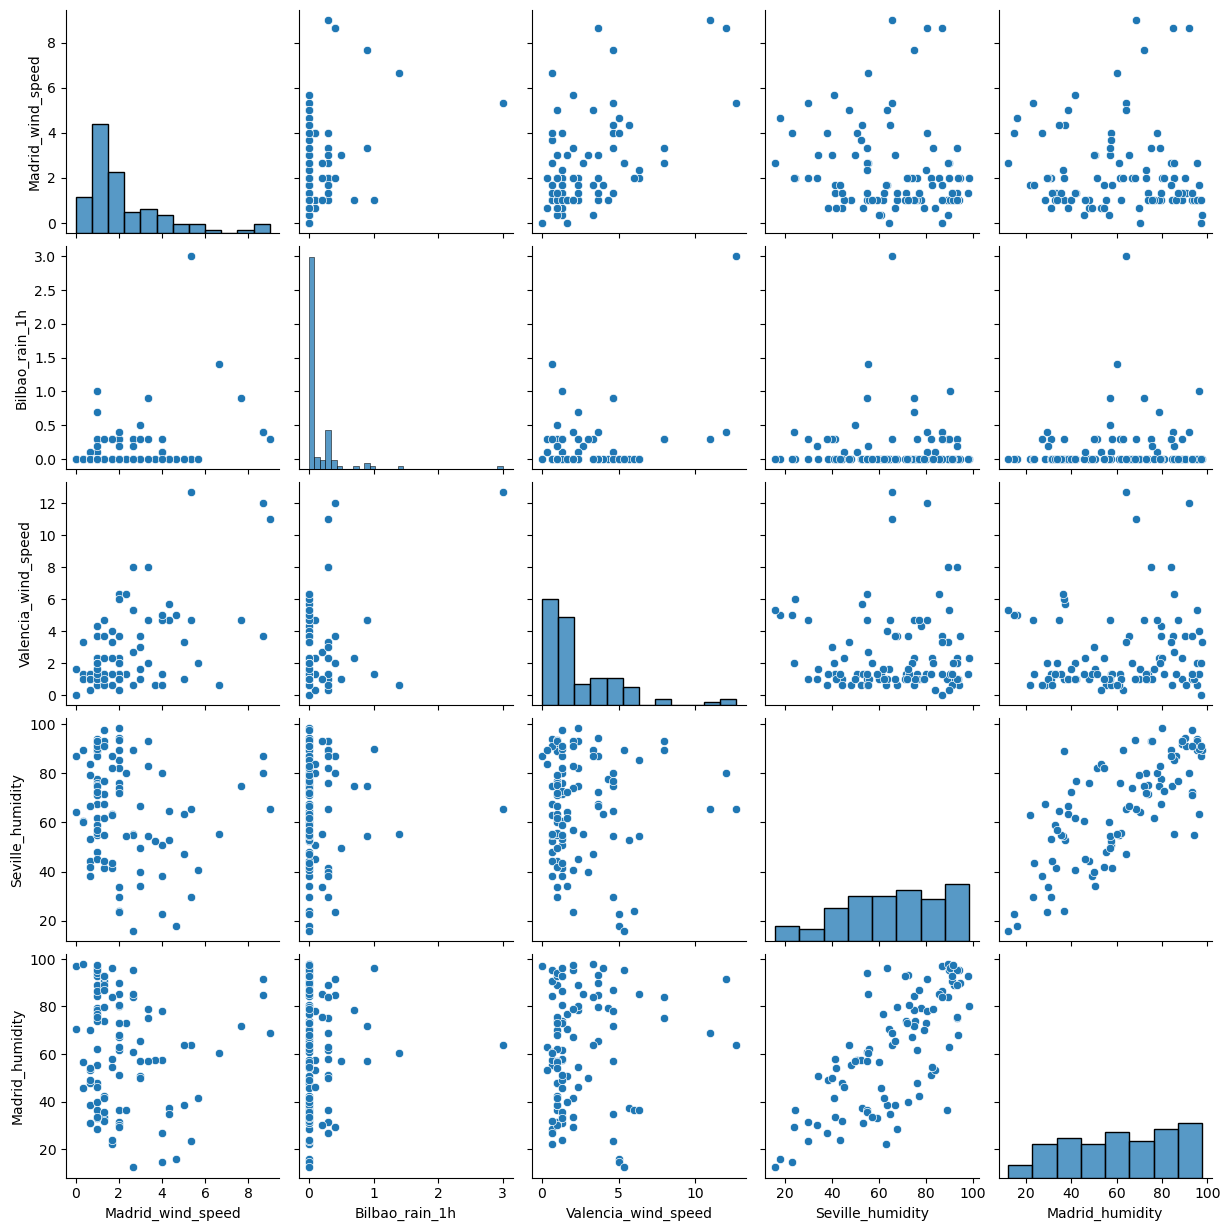

In [21]:
sns.pairplot(df_train[['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity']].sample(100))

<Axes: >

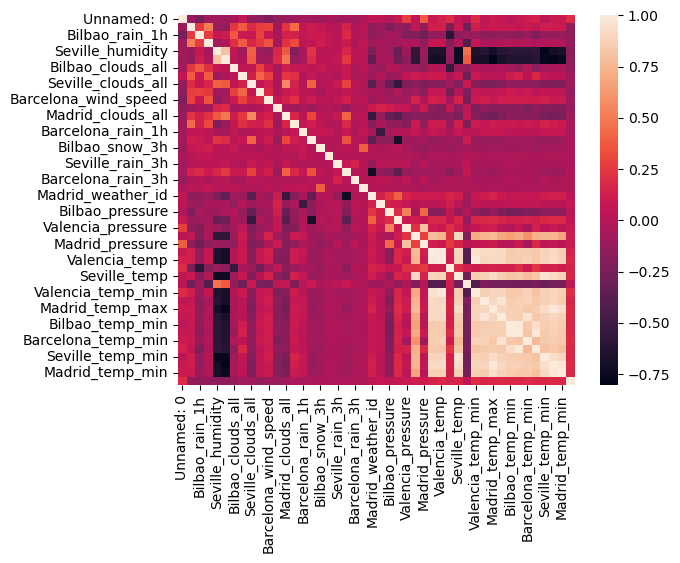

In [22]:
# evaluate correlation
sns.heatmap(df_num_train.corr())

In [23]:
# more detailed and bigger view
heatmap_corr=df_num_train.corr()
heatmap_corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,-0.218781,-0.140449,-0.116928,-0.093926,-0.075692,-0.075340,-0.092377,-0.040157,-0.082525,-0.068980,-0.104326,-0.028130,0.047202,0.034761,-0.022475,0.072472,0.267772,0.039424,0.385578,0.087002,0.135294,0.192485,0.042897,0.023917,0.185468,0.047417,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.37785

In [24]:
train_df= df_train.copy()

In [25]:
test_df = df_test.copy()

C:\Users\Tamika\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


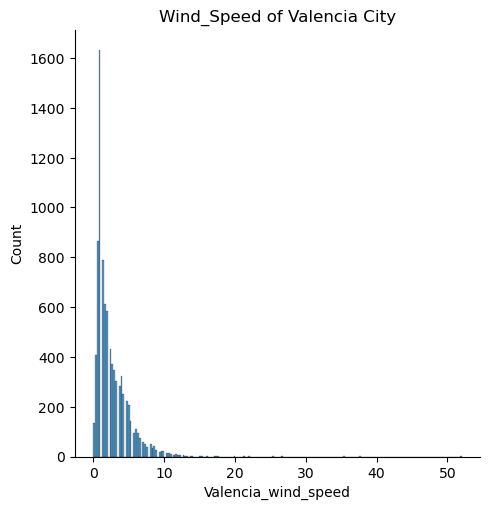

In [26]:
# have a look at feature distributions
# feature distribution
sns.displot(df_train['Valencia_wind_speed'])
plt.title('Wind_Speed of Valencia City')
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [27]:
# remove missing values/ features
train_df = df_train.drop(['Unnamed: 0'], axis=1)

In [28]:
# checking if "unamed: 0" column is dropped
train_df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


### Create new features
We've created new feautures called Year, Month, Day, Hours & Season

In [31]:
# created "years" feature which could show a rate of change in energy supplied from renewable & fossil fuel sources over the years 
train_df['time'] = pd.to_datetime(train_df.time)
train_df['Year'] = train_df[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
# created "month" feature to help us determine the change in energy per season
train_df['Month'] = train_df[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)
# created "day" feature to highlight which days the loadfall occurs mostly
train_df['Day'] = train_df[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
# created "hour" feature to provide the most relevant hours of the day when load shortfalls occur
train_df['Hours'] = train_df[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)

In [32]:
#created each "season" feature
train_df.loc[train_df['Month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
train_df.loc[train_df['Month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
train_df.loc[train_df['Month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
train_df.loc[train_df['Month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

train_df = train_df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)


In [33]:
train_df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hours,winter,spring,summer,autumn
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,6715.666667,2015,1,Thursday,3,1,0,0,0
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,4171.666667,2015,1,Thursday,6,1,0,0,0
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,4274.666667,2015,1,Thursday,9,1,0,0,0
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,5075.666667,2015,1,Thursday,12,1,0,0,0
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,6620.666667,2015,1,Thursday,15,1,0,0,0


In [34]:
test_df = pd.read_csv("df_test.csv")
test_df.loc[test_df['Valencia_pressure'].isna(),'Valencia_pressure'] = \
     test_df.loc[test_df['Valencia_pressure'].isna(), 'Madrid_pressure']
test_df['time'] = pd.to_datetime(test_df.time)
test_df['Year'] = test_df[['time']].applymap(lambda dt:dt.year
 if not pd.isnull(dt.year) else 0)
test_df['Day'] = test_df[['time']].applymap(lambda dt:dt.day_name()
 if not pd.isnull(dt.day_name()) else 0)
test_df['Month'] = test_df[['time']].applymap(lambda dt:dt.month
 if not pd.isnull(dt.month) else 0)

test_df['Hours'] = test_df[['time']].applymap(lambda dt:dt.hour
 if not pd.isnull(dt.day_name()) else 0)
test_df.loc[test_df['Month'].isin([1,2,3]),['winter','spring','summer','autumn']] = [1,0,0,0]
test_df.loc[test_df['Month'].isin([4,5,6]),['winter','spring','summer','autumn']] = [0,1,0,0]
test_df.loc[test_df['Month'].isin([7,8,9]),['winter','spring','summer','autumn']] = [0,0,1,0]
test_df.loc[test_df['Month'].isin([10,11,12]),['winter','spring','summer','autumn']] = [0,0,0,1]

test_df = test_df.astype(
    {
        'winter': int, 'summer': int, 'spring': int, 'autumn': int
    }
)
test_df.shape
test_df
test_dummies = pd.get_dummies(test_df)
test_dummies.columns = [col.replace(" ","_") for col in test_dummies.columns]
test_df.shape
test_df

test_dummies.columns = [col.replace(" ","_") for col in test_dummies.columns]

In [35]:
test_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp,Madrid_temp_min,Year,Day,Month,Hours,winter,spring,summer,autumn
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,279.866667,279.150000,2018,Monday,1,0,1,0,0,0
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,279.193333,278.150000,2018,Monday,1,3,1,0,0,0
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,276.340000,276.150000,2018,Monday,1,6,1,0,0,0
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,275.953333,274.483333,2018,Monday,1,9,1,0,0,0
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,280.686667,280.150000,2018,Monday,1,12,1,0,0,0


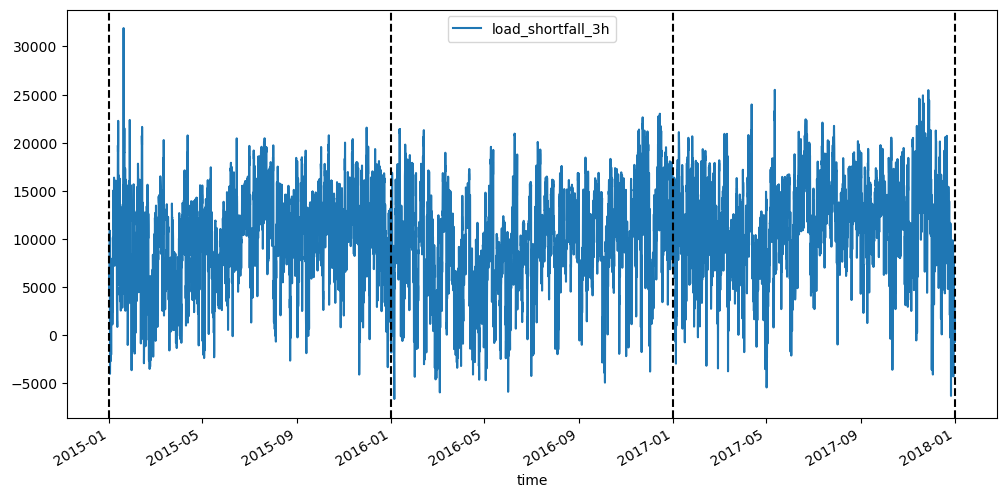

In [36]:
# displayed systematic movements that repeat over a given period with a similar intensity.
ax = train_df.plot(x='time', y='load_shortfall_3h', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01']
for dt in xcoords:
    plt.axvline(x=dt, color='black', linestyle='--')

<Axes: ylabel='Day'>

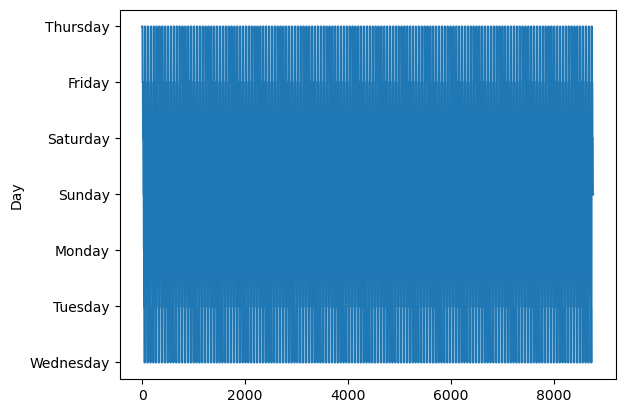

In [37]:
# grouped the 3 hour load shortfall time series by day of the week,shows weekly seasonality.
sns.lineplot(train_df['Day'])

### Engineer existing features

In [38]:
print(train_df.dtypes)

time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg               object
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure                object
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id              float64
Barcelona_weather_id     

In [39]:
# encoding categorical features
day_to_number = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4,
                 'Thursday': 5, 'Friday': 6, 'Saturday': 7}

# Apply the mapping to create the encoded column
train_df['day_numerical'] = train_df['Day'].map(day_to_number)
print(train_df.head())

                 time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0 2015-01-01 03:00:00           0.666667           level_5             0.0   
1 2015-01-01 06:00:00           0.333333          level_10             0.0   
2 2015-01-01 09:00:00           1.000000           level_9             0.0   
3 2015-01-01 12:00:00           1.000000           level_8             0.0   
4 2015-01-01 15:00:00           1.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  ...  loa

In [40]:
day_to_number = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4,
                 'Thursday': 5, 'Friday': 6, 'Saturday': 7}

# Apply the mapping to create the encoded column
test_df['day_numerical'] = test_df['Day'].map(day_to_number)
print(test_df.head())

   Unnamed: 0                time  Madrid_wind_speed Valencia_wind_deg  \
0        8763 2018-01-01 00:00:00           5.000000           level_8   
1        8764 2018-01-01 03:00:00           4.666667           level_8   
2        8765 2018-01-01 06:00:00           2.333333           level_7   
3        8766 2018-01-01 09:00:00           2.666667           level_7   
4        8767 2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_min  Year     Day  \
0          20

In [41]:
train_df = train_df.drop('Day', axis=1)

In [42]:
test_df = test_df.drop('Day', axis=1)

In [43]:
train_df['time_in_hours'] = train_df['time'].dt.hour
# If cyclical encoding needed: df['hour'] = (df['hour'] + 23) % 24
print(train_df.head())

                 time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0 2015-01-01 03:00:00           0.666667           level_5             0.0   
1 2015-01-01 06:00:00           0.333333          level_10             0.0   
2 2015-01-01 09:00:00           1.000000           level_9             0.0   
3 2015-01-01 12:00:00           1.000000           level_8             0.0   
4 2015-01-01 15:00:00           1.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  ...  loa

In [44]:
test_df['time_in_hours'] = test_df['time'].dt.hour
# If cyclical encoding needed: df['hour'] = (df['hour'] + 23) % 24
print(test_df.head())

   Unnamed: 0                time  Madrid_wind_speed Valencia_wind_deg  \
0        8763 2018-01-01 00:00:00           5.000000           level_8   
1        8764 2018-01-01 03:00:00           4.666667           level_8   
2        8765 2018-01-01 06:00:00           2.333333           level_7   
3        8766 2018-01-01 09:00:00           2.666667           level_7   
4        8767 2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_min  Year  Month  \
0          20.

In [45]:
train_df = train_df.drop('time', axis=1)

In [46]:
test_df = test_df.drop('time', axis=1)

In [47]:
Final_train = train_df.head()+test_df.head()
print(Final_train)

   Barcelona_pressure  Barcelona_rain_1h  Barcelona_rain_3h  Barcelona_temp  \
0         2053.666667                0.0                0.0      568.369667   
1         2057.666667                0.0                0.0      564.751667   
2         2061.000000                0.0                0.0      564.733667   
3         2062.666667                0.0                0.0      566.624104   
4         2061.000000                0.0                0.0      571.029833   

   Barcelona_temp_max  Barcelona_temp_min  Barcelona_weather_id  \
0          568.829667          567.829667           1600.000000   
1          565.378333          564.045000           1600.333333   
2          566.067000          563.400333           1600.000000   
3          567.584104          565.584104           1600.000000   
4          571.696500          570.363167           1600.333333   

   Barcelona_wind_deg  Barcelona_wind_speed  Bilbao_clouds_all  ...  \
0          219.333333             10.333333        

In [48]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [49]:
# split data
def remover (df):
    if "_" in df:
        return float(df. split("_")[1].strip())
    else:
        return float(df. split("p")[1].strip());
train_df["Valencia_wind_deg"]=train_df["Valencia_wind_deg"].apply(remover)
train_df["Seville_pressure"]= train_df["Seville_pressure"].apply(remover)

In [50]:
def remover (df):
    if "_" in df:
        return float(df. split("_")[1].strip())
    else:
        return float(df. split("p")[1].strip());
test_df["Valencia_wind_deg"]=test_df["Valencia_wind_deg"].apply(remover)
test_df["Seville_pressure"]= test_df["Seville_pressure"].apply(remover)

In [56]:
train_df.columns = [col.replace(" ","_") for col in train_df.columns] 

In [57]:
test_df.columns = [col.replace(" ","_") for col in test_df.columns]

In [58]:
# create targets and features dataset
column_titles = [col for col in train_df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
train_copy_df = train_df.reindex(columns = column_titles)
train_df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,load_shortfall_3h,Year,Month,Hours,winter,spring,summer,autumn,day_numerical,time_in_hours
0,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,6715.666667,2015,1,3,1,0,0,0,5,3
1,0.333333,10.0,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,4171.666667,2015,1,6,1,0,0,0,5,6
2,1.000000,9.0,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,4274.666667,2015,1,9,1,0,0,0,5,9
3,1.000000,8.0,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,5075.666667,2015,1,12,1,0,0,0,5,12
4,1.000000,7.0,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,6620.666667,2015,1,15,1,0,0,0,5,15


In [59]:
column_titles = [col for col in train_df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
train_df = train_df.reindex(columns = column_titles)
train_df.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Year,Month,Hours,winter,spring,summer,autumn,day_numerical,time_in_hours,load_shortfall_3h
0,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,2015,1,3,1,0,0,0,5,3,6715.666667
1,0.333333,10.0,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,2015,1,6,1,0,0,0,5,6,4171.666667
2,1.000000,9.0,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,2015,1,9,1,0,0,0,5,9,4274.666667
3,1.000000,8.0,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,2015,1,12,1,0,0,0,5,12,5075.666667
4,1.000000,7.0,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,2015,1,15,1,0,0,0,5,15,6620.666667


In [60]:
train_df.isna().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

In [61]:
train_df = train_df.drop('Valencia_pressure', axis=1)

In [62]:
# feature selection
def create_x_y_features(train_copy_df = train_copy_df):
    train_df = train_copy_df.copy(deep = True)
    Y_var = train_df['load_shortfall_3h']
    X_var = train_df[[i for i in train_df if i not in 'load_shortfall_3h']]

    return train_df, Y_var , X_var

In [63]:
def select_k_best(data_df):
    data_df, Y_var, X_var = create_x_y_features(data_df)
    X_train, X_test, y_train, y_test = train_test_split(X_var,
                                                        Y_var,
                                                        test_size= 0.2,
                                                        random_state=42)

    k_best = SelectKBest(score_func= f_regression, k = 50)

    k_best.fit(X_train, y_train)

    X_train_fs, X_test_fs = k_best.transform(X_train), k_best.transform(X_test)
    sns.lineplot([i for i in range(len(k_best.scores_))])
    plt.show()
    
    return k_best, X_train_fs, X_test_fs

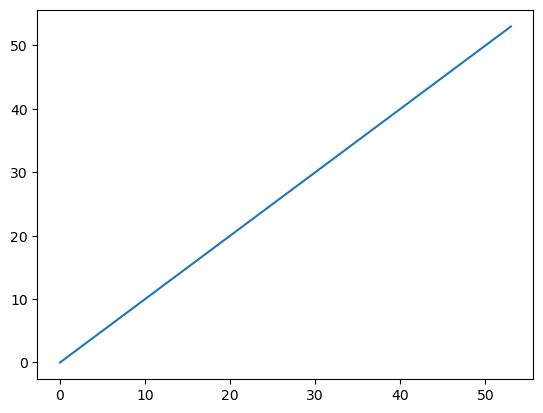

In [64]:
k_best,_,_= select_k_best(train_df)

In [65]:
filter = k_best.get_support()
features = np.array([i for i in train_df.columns if i not in 'load_shortfall_3h'])
 
print("All features before selection:")
print(features)
 
print("The Best 50 selected features are::")
print(features[filter])
print(k_best)

All features before selection:
['Madrid_wind_speed' 'Valencia_wind_deg' 'Bilbao_rain_1h'
 'Valencia_wind_speed' 'Seville_humidity' 'Madrid_humidity'
 'Bilbao_clouds_all' 'Bilbao_wind_speed' 'Seville_clouds_all'
 'Bilbao_wind_deg' 'Barcelona_wind_speed' 'Barcelona_wind_deg'
 'Madrid_clouds_all' 'Seville_wind_speed' 'Barcelona_rain_1h'
 'Seville_pressure' 'Seville_rain_1h' 'Bilbao_snow_3h'
 'Barcelona_pressure' 'Seville_rain_3h' 'Madrid_rain_1h'
 'Barcelona_rain_3h' 'Valencia_snow_3h' 'Madrid_weather_id'
 'Barcelona_weather_id' 'Bilbao_pressure' 'Seville_weather_id'
 'Seville_temp_max' 'Madrid_pressure' 'Valencia_temp_max' 'Valencia_temp'
 'Bilbao_weather_id' 'Seville_temp' 'Valencia_humidity'
 'Valencia_temp_min' 'Barcelona_temp_max' 'Madrid_temp_max'
 'Barcelona_temp' 'Bilbao_temp_min' 'Bilbao_temp' 'Barcelona_temp_min'
 'Bilbao_temp_max' 'Seville_temp_min' 'Madrid_temp' 'Madrid_temp_min'
 'Year' 'Month' 'Hours' 'winter' 'spring' 'summer' 'autumn'
 'day_numerical' 'time_in_hours']
The 

In [66]:
kbest = features[filter]
X = train_df[kbest]
Y = train_df['load_shortfall_3h']
test = test_df[kbest]

### Create one or more ML models
#### Ordinary Least Squares Linear Regression model

In [67]:
# Creating train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, random_state = 1)

from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
#dfm = df_dummies.copy()

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in X.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Valencia_wind_deg + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Year + Month + Hours + winter + spring + summer + autumn + day_numerical + time_in_hours


In [68]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=train_copy_df)
fitted = model.fit()
Y_pred1 = fitted.predict(test)
# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     41.19
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:38:28   Log-Likelihood:                -86548.
No. Observations:                8763   AIC:                         1.732e+05
Df Residuals:                    8714   BIC:                         1.735e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.024e+05 

In [69]:
Resultsdict1 = {'time': df_test['time'],
         'load_shortfall_3h': Y_pred1}
pred_df1 = pd.DataFrame(data = Resultsdict1)
pred_df1

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8626.964562
1,2018-01-01 03:00:00,8301.415123
2,2018-01-01 06:00:00,9412.543984
3,2018-01-01 09:00:00,9305.683141
4,2018-01-01 12:00:00,8727.889451
...,...,...
2915,2018-12-31 09:00:00,9003.202914
2916,2018-12-31 12:00:00,11437.282159
2917,2018-12-31 15:00:00,13522.594438
2918,2018-12-31 18:00:00,13088.105783


In [ ]:
import pandas as pd

pred_df1.to_csv('my_dataframe.csv', index=False)

### Random forest regression model

In [1]:
import numpy as np  # For numerical operations and array manipulation
from sklearn.model_selection import KFold, cross_val_score  # For cross-validation
from sklearn.ensemble import RandomForestRegressor  # For the Random Forest model

In [2]:
#Create kf object for k fold and assign the number of splits
#We used 10 folds 
kf = KFold(n_splits=10)
kf.get_n_splits(X)

NameError: name 'X' is not defined

In [ ]:
# create a range of estimators and calculate optimal parameter using k-fold
estimators = [50, 100, 200, 250, 300, 400]

def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, Y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic